# Computer Vision Masterclass - Autoencoders for image compression

### Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, AveragePooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.4.1'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/cifar10/ and https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
32 * 32

1024

### Visualizing the images

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


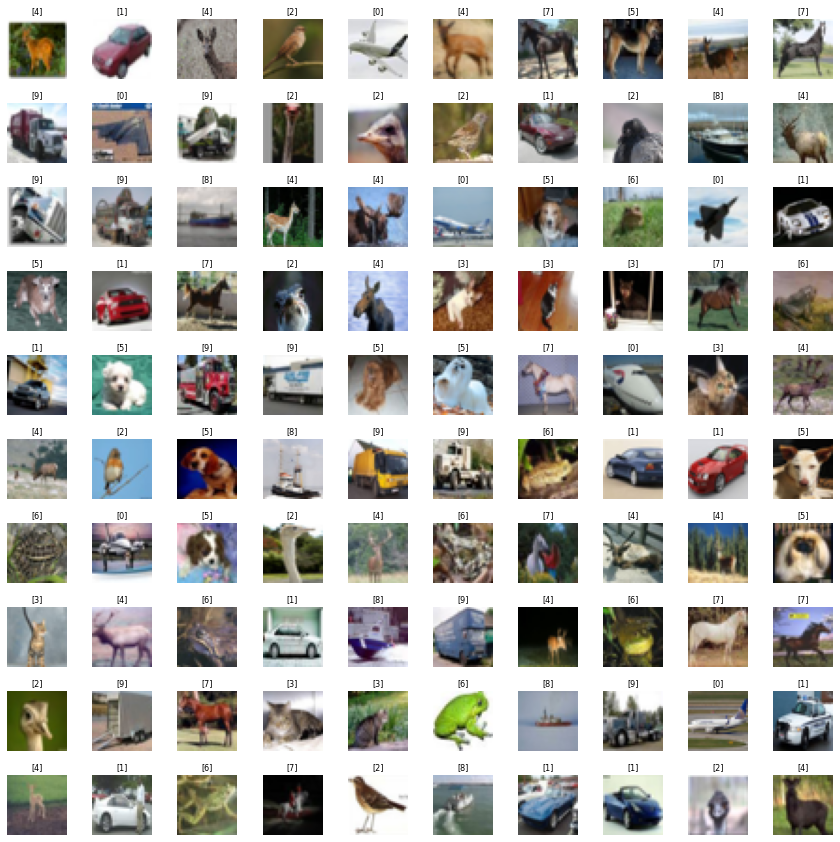

In [ ]:
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 50000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4);

### Pre-processing the images

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Building and training the convolutional autoencoder

In [ ]:
# BatchNormalization: https://keras.io/api/layers/normalization_layers/batch_normalization/

autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same")) # Encoded image

# Decoder
autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(3, (3,3), activation='sigmoid', padding="same"))

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          4

In [ ]:
# Output = (Input - Filter + 1) / Stride

In [ ]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 16s 5ms/step - loss: 0.5969 - accuracy: 0.5896
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5698 - accuracy: 0.7177
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5654 - accuracy: 0.7371
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5643 - accuracy: 0.7491
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5629 - accuracy: 0.7533
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5617 - accuracy: 0.7543
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5620 - accuracy: 0.7565
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5610 - accuracy: 0.7593
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5606 - accuracy: 0.7616
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.56

### Encoding and decoding the test images

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('average_pooling2d_2').output)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 32)          0     

In [ ]:
coded_test_images = encoder.predict(X_test)

In [ ]:
coded_test_images.shape

(10000, 4, 4, 16)

In [ ]:
coded_test_images[0]

array([[[-5.23188412e-02, -2.92872995e-01, -6.00532293e-02,
         -4.18407500e-01,  8.39291513e-02,  2.03679860e-01,
         -3.09622705e-01, -1.91412300e-01,  3.39883029e-01,
          4.08226252e-03,  2.41485834e-02,  2.90768743e-01,
         -4.34977114e-01,  1.21968493e-01,  1.11290276e-01,
         -2.85019100e-01],
        [ 2.37003878e-01, -8.32588226e-02,  2.63108015e-02,
         -8.41380879e-02, -3.09540570e-01, -2.04665795e-01,
         -9.54733044e-02, -3.89088392e-01,  3.37312549e-01,
          5.32798290e-01,  1.63073301e-01,  2.37390637e-01,
         -2.53696024e-01,  3.39553297e-01,  3.70253325e-01,
         -1.11683220e-01],
        [ 3.77414972e-02,  1.82710782e-01,  1.50476441e-01,
         -2.35133767e-01,  3.13344359e-01,  1.06542394e-01,
         -1.03599459e-01,  2.37221152e-01,  7.04327002e-02,
         -8.84751454e-02,  7.71301761e-02,  2.27785870e-01,
         -2.29923695e-01, -1.57505006e-01,  3.33573699e-01,
         -1.85916200e-01],
        [ 2.5152987

In [ ]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

(10000, 32, 32, 3)

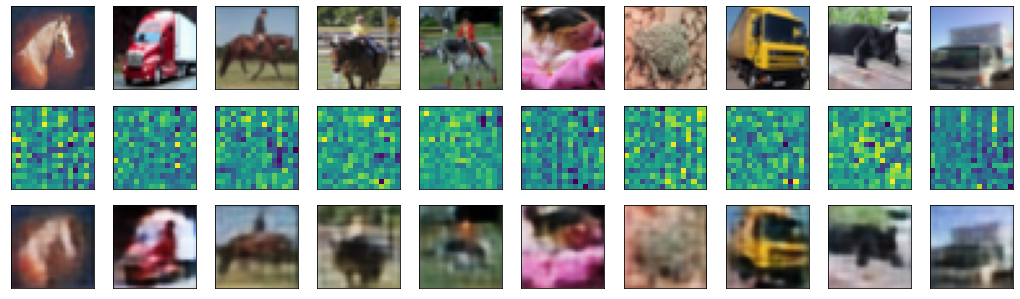

In [ ]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):

  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())

  # Coded image
  ax = plt.subplot(10,10,i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,16))
  plt.xticks(())
  plt.yticks(())

  # Decoded image
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())